In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

%matplotlib inline

## Case: 4-T-T

In [39]:
df = {}
case = "model-4-true-true"

# deephyper-RF
label = "DeepHyper"
df[label] = []
for i in range(1,6):
    df[label].append(pd.read_csv(f"exp/deephyper_rf/{case}-{i}/results.csv"))
    df[label][i-1]["objective"] = np.exp(-df[label][i-1]["objective"])

# GPTune
label = "GPtune"
df[label] = []
for i in range(1,6):
    df[label].append(pd.read_csv(f"exp/gptune/{case}-{i}/results.csv"))
    df[label][i-1]["objective"] = np.exp(df[label][i-1]["objective"])
    df[label][i-1].rename(columns={"elapsed_sec": "timestamp_end"}, inplace=True)
    df[label][i-1] = df[label][i-1][(df[label][i-1]["timestamp_end"] < 3600)]

# HiPerBOt
label = "HiPerBOt"
df[label] = []
for i in range(1,6):
    df[label].append(pd.read_csv(f"exp/HiPerBOt/{case}-{i}/results.csv"))
    df[label][i-1]["objective"] = np.exp(df[label][i-1]["objective"])
    df[label][i-1]["timestamp_end"] = df[label][i-1]["objective"].cumsum()
    df[label][i-1] = df[label][i-1][(df[label][i-1]["timestamp_end"] < 3600)]

colors = {
    "DeepHyper": "cyan",
    "GPtune": "orange",
    "HiPerBOt": "magenta"
}

linestyle = {
    "DeepHyper": "-",
    "GPtune": "-",
    "HiPerBOt": "-"
}

In [41]:
# statistic on the number of evaluations

n_evals = {}

for k, df_list in df.items():
    n_evals_k = []
    for i, df_i in enumerate(df_list):
        n_evals_k.append(len(df_i))
    n_evals_mean = np.mean(n_evals_k)
    n_evals_se = np.std(n_evals_k)/np.sqrt(len(n_evals_k))
    print(f"{k}: {n_evals_mean:.0f} ± {n_evals_se:.0f}")

DeepHyper: 560 ± 27
GPtune: 36 ± 2
HiPerBOt: 28 ± 2


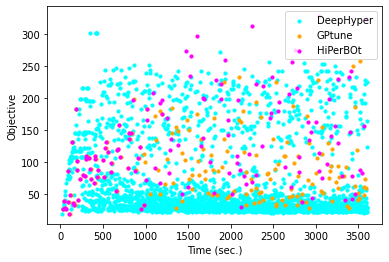

In [42]:
plt.figure()

for k, df_list in df.items():
    for i, df_i in enumerate(df_list):
        subdf = df_i
        x = subdf["timestamp_end"]
        y = subdf["objective"]
        if i == 0:
            plt.scatter(x, y, s=10, color=colors[k], label=k)
        else:
            plt.scatter(x, y, s=10, color=colors[k])

plt.legend()
plt.xlabel("Time (sec.)")
plt.ylabel("Objective")
plt.show()

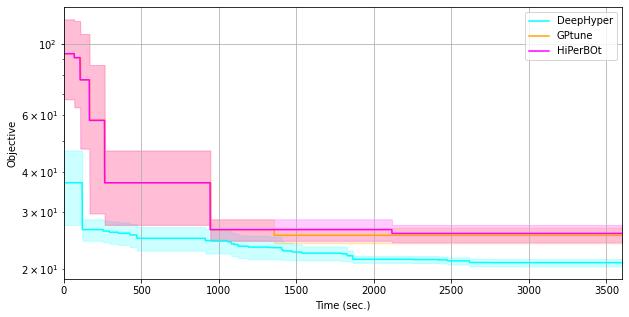

In [43]:
plt.figure(figsize=(10, 5))

for k, df_list in df.items():
    T = np.linspace(0, 3600, 3601)
    y_list = []
    for i, df_i in enumerate(df_list):
        df_i = df_i.sort_values("timestamp_end")
        x, y = df_i.timestamp_end.to_numpy(), df_i.objective.cummin().to_numpy()
        f = interp1d(x, y, kind="previous", fill_value="extrapolate")
        y = f(T)
        y_list.append(y)

    y_list = np.asarray(y_list)
    y_mean = y_list.mean(axis=0)
    y_std = y_list.std(axis=0)
    y_se = y_std/np.sqrt(y_list.shape[0])
    y_min = y_list.min(axis=0)
    y_max = y_list.max(axis=0)

    plt.plot(T, y_mean, color=colors[k], linestyle=linestyle[k], label=k)
    # plt.fill_between(T, y_min, y_max, color=colors[k], alpha=0.2)
    # plt.fill_between(T, y_mean-1.96*y_std, y_mean+1.96*y_std, color=colors[k], alpha=0.2)
    plt.fill_between(T, y_mean-y_se, y_mean+y_se, color=colors[k], alpha=0.2)

plt.legend()
plt.xlabel("Time (sec.)")
plt.ylabel("Objective")
plt.grid()
plt.yscale("log")
plt.xlim(0, 3600)
plt.show()

## Case: 8-T-T

In [44]:
df = {}
case = "model-8-true-true"

# deephyper-RF
label = "DeepHyper"
df[label] = []
for i in range(1,6):
    df[label].append(pd.read_csv(f"exp/deephyper_rf/{case}-{i}/results.csv"))
    df[label][i-1]["objective"] = np.exp(-df[label][i-1]["objective"])

# GPTune
label = "GPtune"
df[label] = []
for i in range(1,6):
    df[label].append(pd.read_csv(f"exp/gptune/{case}-{i}/results.csv"))
    df[label][i-1]["objective"] = np.exp(df[label][i-1]["objective"])
    df[label][i-1].rename(columns={"elapsed_sec": "timestamp_end"}, inplace=True)
    df[label][i-1] = df[label][i-1][(df[label][i-1]["timestamp_end"] < 3600)]

# HiPerBOt
# label = "HiPerBOt"
# df[label] = []
# for i in range(1,6):
#     df[label].append(pd.read_csv(f"exp/HiPerBOt/{case}-{i}/results.csv"))
#     df[label][i-1]["objective"] = np.exp(df[label][i-1]["objective"])
#     df[label][i-1]["timestamp_end"] = df[label][i-1]["objective"].cumsum()
#     df[label][i-1] = df[label][i-1][(df[label][i-1]["timestamp_end"] < 3600)]

colors = {
    "DeepHyper": "cyan",
    "GPtune": "orange",
    "HiPerBOt": "magenta"
}

linestyle = {
    "DeepHyper": "-",
    "GPtune": "-",
    "HiPerBOt": "-"
}

In [45]:
# statistic on the number of evaluations

n_evals = {}

for k, df_list in df.items():
    n_evals_k = []
    for i, df_i in enumerate(df_list):
        n_evals_k.append(len(df_i))
    n_evals_mean = np.mean(n_evals_k)
    n_evals_se = np.std(n_evals_k)/np.sqrt(len(n_evals_k))
    print(f"{k}: {n_evals_mean:.0f} ± {n_evals_se:.0f}")

DeepHyper: 489 ± 8
GPtune: 33 ± 2


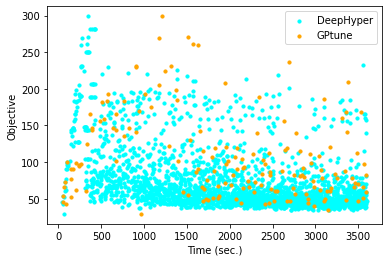

In [46]:
plt.figure()

for k, df_list in df.items():
    for i, df_i in enumerate(df_list):
        subdf = df_i
        x = subdf["timestamp_end"]
        y = subdf["objective"]
        if i == 0:
            plt.scatter(x, y, s=10, color=colors[k], label=k)
        else:
            plt.scatter(x, y, s=10, color=colors[k])

plt.legend()
plt.xlabel("Time (sec.)")
plt.ylabel("Objective")
plt.show()

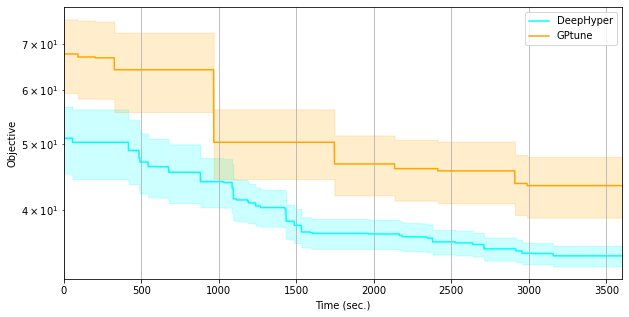

In [49]:
plt.figure(figsize=(10, 5))

for k, df_list in df.items():
    T = np.linspace(0, 3600, 3601)
    y_list = []
    for i, df_i in enumerate(df_list):
        df_i = df_i.sort_values("timestamp_end")
        x, y = df_i.timestamp_end.to_numpy(), df_i.objective.cummin().to_numpy()
        f = interp1d(x, y, kind="previous", fill_value="extrapolate")
        y = f(T)
        y_list.append(y)

    y_list = np.asarray(y_list)
    y_mean = y_list.mean(axis=0)
    y_std = y_list.std(axis=0)
    y_se = y_std/np.sqrt(y_list.shape[0])
    y_min = y_list.min(axis=0)
    y_max = y_list.max(axis=0)

    plt.plot(T, y_mean, color=colors[k], linestyle=linestyle[k], label=k)
    # plt.fill_between(T, y_min, y_max, color=colors[k], alpha=0.2)
    # plt.fill_between(T, y_mean-1.96*y_std, y_mean+1.96*y_std, color=colors[k], alpha=0.2)
    plt.fill_between(T, y_mean-y_se, y_mean+y_se, color=colors[k], alpha=0.2)

plt.legend()
plt.xlabel("Time (sec.)")
plt.ylabel("Objective")
plt.grid()
plt.yscale("log")
plt.xlim(0, 3600)
plt.show()

## Case: 8-T-T TL

In [50]:
df = {}
case = "model-8-true-true-tl"

# deephyper-RF
label = "DeepHyper"
df[label] = []
for i in range(1,6):
    df[label].append(pd.read_csv(f"exp/deephyper_rf/{case}-{i}/results.csv"))
    df[label][i-1]["objective"] = np.exp(-df[label][i-1]["objective"])

# GPTune
label = "GPtune"
df[label] = []
for i in range(1,6):
    df[label].append(pd.read_csv(f"exp/gptune/{case}-{i}/results.csv"))
    df[label][i-1]["objective"] = np.exp(df[label][i-1]["objective"])
    df[label][i-1].rename(columns={"elapsed_sec": "timestamp_end"}, inplace=True)
    df[label][i-1] = df[label][i-1][(df[label][i-1]["timestamp_end"] < 3600)]

# HiPerBOt
# label = "HiPerBOt"
# df[label] = []
# for i in range(1,6):
#     df[label].append(pd.read_csv(f"exp/HiPerBOt/{case}-{i}/results.csv"))
#     df[label][i-1]["objective"] = np.exp(df[label][i-1]["objective"])
#     df[label][i-1]["timestamp_end"] = df[label][i-1]["objective"].cumsum()
#     df[label][i-1] = df[label][i-1][(df[label][i-1]["timestamp_end"] < 3600)]

colors = {
    "DeepHyper": "cyan",
    "GPtune": "orange",
    "HiPerBOt": "magenta"
}

linestyle = {
    "DeepHyper": "-",
    "GPtune": "-",
    "HiPerBOt": "-"
}

In [51]:
# statistic on the number of evaluations

n_evals = {}

for k, df_list in df.items():
    n_evals_k = []
    for i, df_i in enumerate(df_list):
        n_evals_k.append(len(df_i))
    n_evals_mean = np.mean(n_evals_k)
    n_evals_se = np.std(n_evals_k)/np.sqrt(len(n_evals_k))
    print(f"{k}: {n_evals_mean:.0f} ± {n_evals_se:.0f}")

DeepHyper: 613 ± 47
GPtune: 28 ± 1


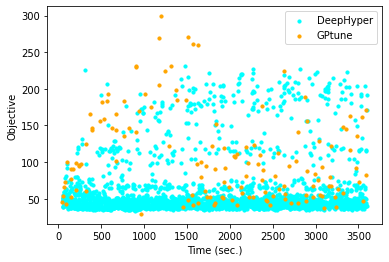

In [52]:
plt.figure()

for k, df_list in df.items():
    for i, df_i in enumerate(df_list):
        subdf = df_i
        x = subdf["timestamp_end"]
        y = subdf["objective"]
        if i == 0:
            plt.scatter(x, y, s=10, color=colors[k], label=k)
        else:
            plt.scatter(x, y, s=10, color=colors[k])

plt.legend()
plt.xlabel("Time (sec.)")
plt.ylabel("Objective")
plt.show()

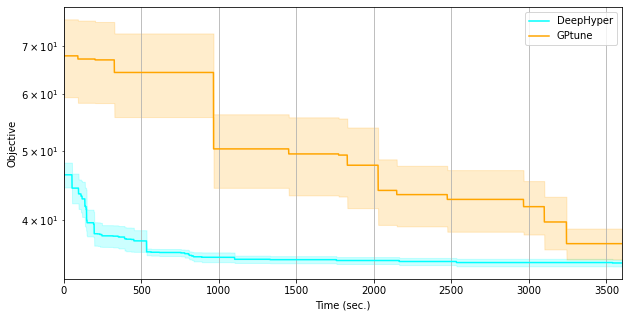

In [53]:
plt.figure(figsize=(10, 5))

for k, df_list in df.items():
    T = np.linspace(0, 3600, 3601)
    y_list = []
    for i, df_i in enumerate(df_list):
        df_i = df_i.sort_values("timestamp_end")
        x, y = df_i.timestamp_end.to_numpy(), df_i.objective.cummin().to_numpy()
        f = interp1d(x, y, kind="previous", fill_value="extrapolate")
        y = f(T)
        y_list.append(y)

    y_list = np.asarray(y_list)
    y_mean = y_list.mean(axis=0)
    y_std = y_list.std(axis=0)
    y_se = y_std/np.sqrt(y_list.shape[0])
    y_min = y_list.min(axis=0)
    y_max = y_list.max(axis=0)

    plt.plot(T, y_mean, color=colors[k], linestyle=linestyle[k], label=k)
    # plt.fill_between(T, y_min, y_max, color=colors[k], alpha=0.2)
    # plt.fill_between(T, y_mean-1.96*y_std, y_mean+1.96*y_std, color=colors[k], alpha=0.2)
    plt.fill_between(T, y_mean-y_se, y_mean+y_se, color=colors[k], alpha=0.2)

plt.legend()
plt.xlabel("Time (sec.)")
plt.ylabel("Objective")
plt.grid()
plt.yscale("log")
plt.xlim(0, 3600)
plt.show()